## Importing the libraries

In [21]:
# import libraries 
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# load data set and preprocessing 

In [22]:
# Step 1: Load the Dataset
DATASET_DIR = r"C:\Users\Umar Attique\Downloads\archive (16)\data"  # Replace with the path to your dataset
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.2)  # Split into training and validation sets

In [23]:
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


### Plotting the images

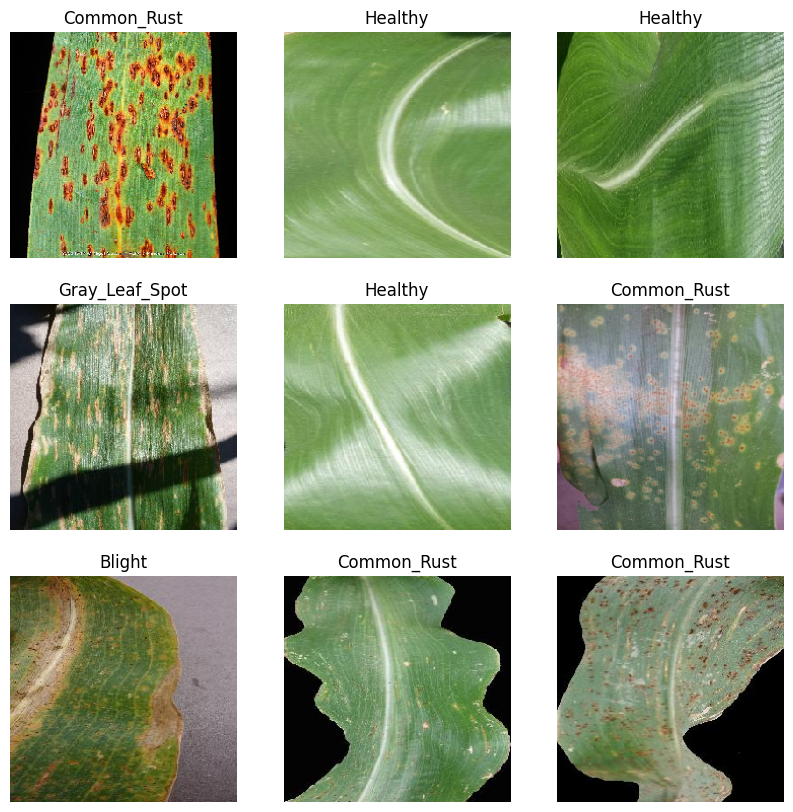

In [24]:
# Step 2: Plot Some Sample Images
def plot_sample_images(generator, classes):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(classes[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

classes = list(train_generator.class_indices.keys())
plot_sample_images(train_generator, classes)

### Number count of classes

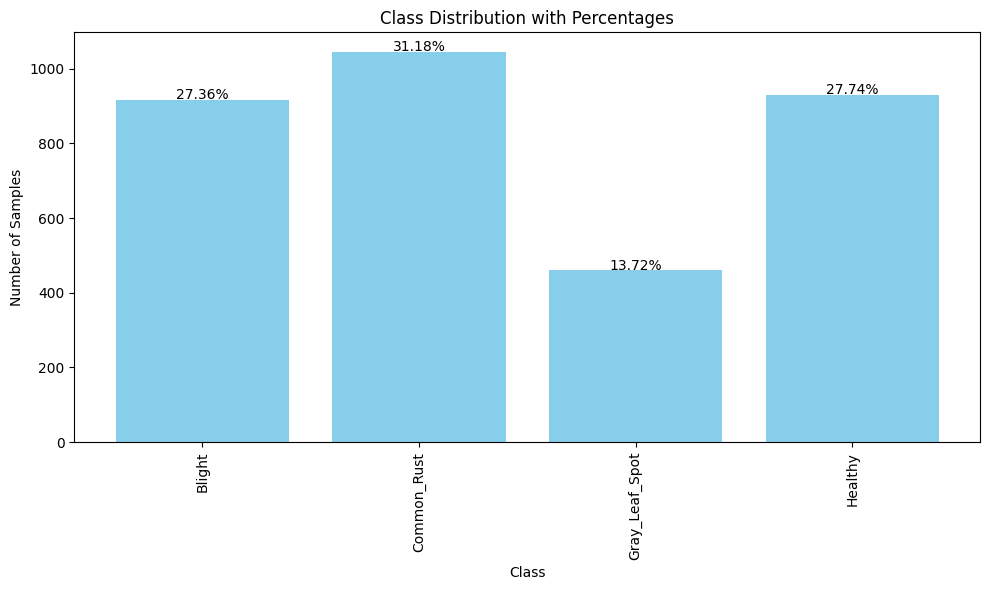

In [25]:
from collections import Counter
# Step 3: Check Class Distribution with Percentage
class_counts = Counter(train_generator.classes)
total_samples = sum(class_counts.values())

# Plot Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')

# Add percentages on top of bars
for bar in bars:
    height = bar.get_height()
    percentage = f"{(height / total_samples) * 100:.2f}%"  # Calculate percentage
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, percentage, ha='center', fontsize=10)

# Add Labels and Title
plt.xticks(list(class_counts.keys()), list(classes), rotation=90)
plt.title("Class Distribution with Percentages")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


### Checking the nature of dataset

In [18]:
# Check for imbalance
max_count = max(class_counts.values())
min_count = min(class_counts.values())
if max_count / min_count > 1.5:  # Arbitrary threshold for imbalance
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")


The dataset is imbalanced.


### Applying the MobileNetV2

In [26]:
# Load the pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Build the custom model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[early_stopping]
)


c:\Users\Umar Attique\anaconda3\envs\env4tl\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.7386 - loss: 3.0819 - val_accuracy: 0.8361 - val_loss: 0.3360
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.8574 - loss: 0.4366 - val_accuracy: 0.8935 - val_loss: 0.3130
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.8705 - loss: 0.3156 - val_accuracy: 0.8947 - val_loss: 0.3896
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.8756 - loss: 0.3561 - val_accuracy: 0.9007 - val_loss: 0.2674
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.8895 - loss: 0.3195 - val_accuracy: 0.9175 - val_loss: 0.2332


In [28]:
# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 950ms/step - accuracy: 0.9143 - loss: 0.2663
Validation Loss: 0.2332
Validation Accuracy: 0.9175


### Plotting the model accuracy

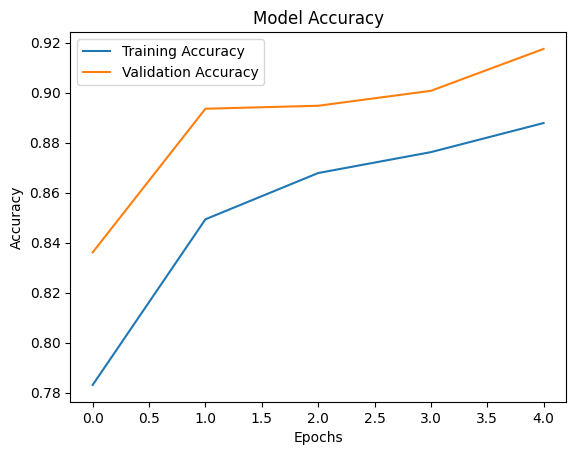

In [29]:
# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

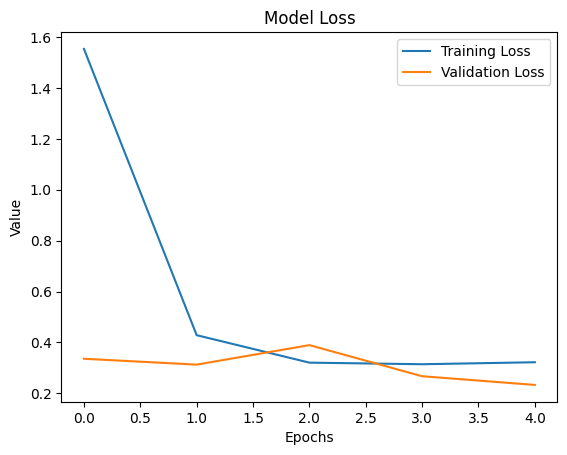

In [36]:

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add titles and labels
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [32]:
model.save('corn_disease.keras')

In [34]:

import os
if os.path.exists('corn_disease.keras'):
    print("Model saved successfully!")
else:
    print("Model file not found.")


Model saved successfully!


In [8]:
# Evaluate the model on validation data
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

# Save the trained model
model.save('corn_disease_detector.h5')


27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 563ms/step - accuracy: 0.9111 - loss: 0.2143


Validation Accuracy: 0.92


In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(image_path, model):
    # Load and preprocess image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    class_label = train_generator.class_indices
    class_label = {v: k for k, v in class_label.items()}  # Reverse dictionary
    return class_label[class_index]

# Example usage
test_image_path = "E:/DataSet/Blight/Corn_Blight (244).JPG"
print(f"Prediction: {predict_image(test_image_path, model)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: Blight


In [11]:
! pip install flask tensorflow pillow

In [12]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import os

app = Flask(__name__)

# Load the trained model
model = load_model('corn_disease_detector.h5')

# Define class labels
class_labels = {0: 'Healthy', 1: 'Common_Rust', 2: 'Blight',3:'Gray_Leaf_Spot'}

# Prediction endpoint
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file provided'}), 400

    file = request.files['file']

    if file.filename == '':
        return jsonify({'error': 'No file selected'}), 400

    try:
        # Load and preprocess image
        img = load_img(file, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)

        # Make prediction
        predictions = model.predict(img_array)
        class_index = np.argmax(predictions)
        class_name = class_labels[class_index]

        return jsonify({'class': class_name, 'confidence': float(predictions[0][class_index])})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: 1

C:\Users\babar\anaconda3\envs\face_aligne_env\lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [15]:
app.py

AttributeError: 'Flask' object has no attribute 'py'